# Project 7 Report
## Team members:
## Christopher Higgs
## Supratik Chanda

## Introduction:

###  Gender Recognition by Voice and Speech Analysis:
### This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## Dataset:
### The following acoustic properties of each voice are measured and included within the CSV:

### meanfreq: mean frequency (in kHz)
### sd: standard deviation of frequency
### median: median frequency (in kHz)
### Q25: first quantile (in kHz)
### Q75: third quantile (in kHz)
### IQR: interquantile range (in kHz)
### skew: skewness (see note in specprop description)
### kurt: kurtosis (see note in specprop description)
### sp.ent: spectral entropy
### sfm: spectral flatness
### mode: mode frequency
### centroid: frequency centroid (see specprop)
### peakf: peak frequency (frequency with highest energy)
### meanfun: average of fundamental frequency measured across acoustic signal
### minfun: minimum fundamental frequency measured across acoustic signal
### maxfun: maximum fundamental frequency measured across acoustic signal
### meandom: average of dominant frequency measured across acoustic signal
### mindom: minimum of dominant frequency measured across acoustic signal
### maxdom: maximum of dominant frequency measured across acoustic signal
### dfrange: range of dominant frequency measured across acoustic signal
### modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
### label: male or female

# Analysis Technique

### Steps:
#### 1)At first , each X features column had dollar sign which was cleansed   and the data type was changed from object to float64.
#### 2) We then checked for any duplicate values in the dataset and removed any duplicate values
#### 2)Then, we used SelectKBest features from feature_selection package of scikit-learn to select which features should be taken. The SelectKBest features gives an array of score_values in precentage and another array of p_values . Whosoevers' score or p_value is greater , it has a deeper effect on the Y_label. So, we took column name "kurt"(p-0.00 and score-119.87) to "mindom"(p-0.00 and score-9.86). The score_function are chi2 and f_classif. We took chi2 and went ahead with the score func for finding the accuracy,precision and f1_score and confusion_matrix.

# Logistic Regression: 
#### We divided the dataset into train_set and test_set and then performed training and testing of the data. At first, we used LabelEncoder for the Y_Label but then we found out that without encoding also, the performance is not decreasing. Hence, we went without encoding for determining the Label.

#### After that, We used GridSearchCV and RandomizedSearchCV to find out which produces the most accuracy and has the least execution time. We found out that RandomizedSearchCV is the most efficient model_selection technique and the execution time is the quickest. The following analysis is done using RandomizedSearchCV.

#### We used Multi-Class "OVR" and multi-class "multinomial" to find out which class is the best for generalization . Realized that One over Rest is the best approach.
#### OVR has the following results:

<img src='pic1.png' style='height:150px'/>
 
#### Multinomial has the following results:

<img src='LR_1.png' style='height:40px'/>

#### We also found out the precision, f_score and confusion_matrix (shown below) to find out the total  number of incorrect predictions for OVR approach

<img src='LR_2.png' style='height:100px'/>

# 7) The next model was SVM Linear:

### Taking all the values of C and checking out the accuracy score with kernel as linear.
#### The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

#### Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well.From the above plot we can see that accuracy has been close to 97% for C=1, C=5 and C=6 and then it drops around 96.8% and remains constant.

<img src='SVM_LINEAR.png' style='height:200px'/>

#### Once done,we  used the C values with  GridSearchCV and RandomizedSearchCV to find out the accuracy and f1_score.
#### Surprisingly, we found out that RandomizedCV took less time than GridsearchCV. The time for GridSearchCV was 117ms and that of RandomizedSearchCV was 11ms. 
#### We went ahead with our analysis with RandomizedSearchCV

<img src='linear.png' style='height:200px'/>

#### We used predict_proba function to find out what are the probabilities of the predicted values. We found out that there are four incorrect predictions. The figure and analysis is given in the results

# Next: SVM RBF
#### Taking kernel as rbf and taking different values gamma
#### Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other
#### We saw that for gamma=10 and 100 the kernel is performing poorly.We  also saw a slight dip in accuracy score when gamma is 1.
#### Once done, we used the RandomizedSearchCV as the grid_search model_selectionand passed gamma value=0.01 and a list of class weights inside the param_grids as paramaters. We found out that changing the class weight from {0:1} to {0:6} decreases the accuracy.Hence, stuck with class_weight {0:1}

<img src='grid_score_poly_1.png' style='height:300px'/>

#### The execution time was also very less and went on to find the precision,f_score and accuracy for the model.
#### Also used the predict_proba method to find out the probabilities of all predictions.
#### Used Confusion_mtarix to find the total number of incorrect predictions and also used boxplots to visually figure out the range of the probabilities for both the correct and the incorrect predictions

<img src='svm_rbf_matrix.png' style='height:100px'/>

 

# NEXT SVM POLY
#### Taking kernel as poly and different values of polynomial degree
#### We first used cross-validation to find out which polynomial degree is the best for attaining the best accuracy_score

<img src='poly_pic.png' style='height:200px'/>
    
#### Then, we used that degree, gamma and class weights as parameters in RandomizedSearchCV to find out the class weight for the best accuracy score.

<img src='grid_score_poly.png' style='height:200px'/>

#### We also found the execution time for RandomizedSearchCV.

<img src='poly_time.png' style='height:40px'/>

#### After that, we analysed the total number of incorrect predictions using confusion_matrix

<img src='svm_poly_matrix.png' style='height:100px'/>

 #### Also used the predict_proba method to find out the probabilities of all predictions and applied boxplots to visually figure out the range of the probabilities for both the correct and the incorrect predictions


# Results:
#### The dataset Cleansing:
#### The Voice Recognition Dataset before cleansing:
<img src='result_3.png' style='height:400px'/>

#### The dataset after cleansing 'S' symbol and converting the object datatype to float datatype

<img src='result_4.png' style='height:400px'/>

#### The feature_selection technique used is SelectKBest; chosen among SeleckBest and SelectPrecentile . The function_score tested are chi2 and f_classify and found out the chi2 gives more distinct p_values and score

<img src='result_1.png' style='height:500px'/>

#### Displayed as a dataframe

<img src='result_2.png' style='height:500px'/>

#### Took features from  kurt to mindom whose p_value was significant

## Logistic Regression

#### Grid SearchCV results and execution time(multi-class=OVR):

<img src='LR_OVR.png' style='height:200px'/>

#### Test accuracy:

<img src='LR_OVR_GRID_Test_accuracy.png' style='height:60px'/> 

#### Randomized SearchCV results and execution time(multi-class=OVR):

<img src='LR_multiclass_randomized.png' style='height:200px'/>

#### Test accuracy:

<img src='LR_multiclass_randomized_test_accuracy.png' style='height:50px'/> 

#### Both accuracy is exactly the same . The only difference is the execution time. Randomized SearchCV has much lesser execution time. So. we went with RandomizedCV and below are the results

#### The overall scores:

<img src='result_7.png' style='height:100px'/> 

#### The dataframe containing values with incorrect predictions and their probability.
#### 0 = female,1=male

<img src='predict_proba_LR.png' style='height:400px'/>

#### Now, Lets see the Score for multi-class=multinomial using RandomizedCV:

<img src='result_8.png' style='height:100px'/>

<img src='result_9.png' style='height:100px'/>

#### Hence, we see that OVR is the best approach for Logistic Regression

# SVM KERNEL=LINEAR

#### Analysing the accuracy score with different values of C
<img src='SVM_linearPic_1.png' style='height:300px'/>
<img src='SVM_linearPic_2.png' style='height:300px'/>

#### Going ahead with the C-Value  which produces the most accuracy.Then feeding the C-value in GridSearchCV and RandomizedSearchCV:
#### Scores,execution time and test_accuracy for GridSearchCV:

<img src='SVM_linear_grid.png' style='height:100px'/>
<img src='SVM_linear_grid_2.png' style='height:50px'/>

#### Scores, execution time and test_accuracy for RandomizedSearchCV:

<img src='SVM_linear_grid_3.png' style='height:200px'/>
<img src='SVM_linear_grid_4.png' style='height:60px'/>
#### The accuracy is a bit lower but the execution time is much lesser and hence, we are using RandomizedSearchCV.

<img src='SVM_linear_grid_5.png' style='height:100px'/>


#### Then we found out the shape of the dataframe containing the incorrect values and found out the total  incorrect values to be 8 .
#### The linechart  of the predict_probabilties is shown below :
#### X and Y axis are the probabilities of the predicted values

<img src='SVM_linear_grid_6.png' style='height:500px'/>

# SVM KERNEL=RBF
#### Analyzing the accuracy score with different values of gamma
<img src='rbf_1.png' style='height:300px'/>
<img src='rbf_2.png' style='height:300px'/>
#### We found out that gamma value 0.01 gives the highest accuracy.
#### Hence, we give the gamma value along with other values as parameter to RandomizedSearchCV and see the results:

<img src='rbf_3.png' style='height:300px'/>

#### We see that calss weight{0:1} gives the best prediction

#### Then we go ahead with class weight =0:1 and use RandomizedSearchCV:

<img src='rbf_4.png' style='height:200px'/>

#### Test Accuracy:

<img src='rbf_5.png' style='height:40px'/>

#### other results:
<img src='rbf_6.png' style='height:100px'/>
#### Then, we used the predict_proba method of RandomizedSearchCV to find out the probablity of each predicted value.
#### Boxplot showing the probability  range of the incorrect and correct predicted values

<img src='rbf_7.png' style='height:300px'/>
#### 1 implies Actual values are not equal to Predicted Values
#### 0 implies Actual values equal to Predicted Values
#### Here we see  see that the  predicted values which are correct has a  greater  probability

# SVM KERNEL=POLY
#### Analyzing the accuracy score with different values of polynomial degree

<img src='poly_1.png' style='height:300px'/>
<img src='poly_2.png' style='height:300px'/>

#### We found out that degree value 3 gives the highest accuracy.
#### Hence, we give the degree value along with other values as parameter to RandomizedSearchCV and see the results:

<img src='poly_3.png' style='height:300px'/>

#### Since class_weight {0:1} has the greatest grid_score, we go ahead with class weight =0:1 and use RandomizedSearchCV:

<img src='poly_4.png' style='height:100px'/>

#### Test Accuracy:

<img src='poly_5.png' style='height:40px'/>

#### The confusion matrix result as shown below:

<img src='poly_6.png' style='height:100px'/>
#### The incorrect values total is 13.

#### The next dataframe is the dataframe of incorrect predicted values and their predicted proababilities of being the incorrect  one
<img src='poly_7.png' style='height:400px'/>

#### Then, we used the predict_proba method of RandomizedSearchCV to find out the probablity of each predicted value.
#### Boxplot showing the probability  range of the incorrect and correct predicted values
<img src='poly_8.png' style='height:400px'/>

#### 1 implies Actual values are not equal to Predicted Values
#### 0 implies Actual values equal to Predicted Values
#### Here we see  see that the  predicted values which are correct has a  greater  probability


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split

In [200]:
df =pd.read_csv('VoiceRecognition.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,$0.06,$0.06,$0.03,$0.02,$0.09,$0.08,$12.86,$274.40,$0.89,$0.49,...,$0.06,$0.08,$0.02,$0.28,$0.01,$0.01,$0.01,$0.00,$0.00,male
1,$0.07,$0.07,$0.04,$0.02,$0.09,$0.07,$22.42,$634.61,$0.89,$0.51,...,$0.07,$0.11,$0.02,$0.25,$0.01,$0.01,$0.05,$0.05,$0.05,male
2,$0.08,$0.08,$0.04,$0.01,$0.13,$0.12,$30.76,"$1,024.93",$0.85,$0.48,...,$0.08,$0.10,$0.02,$0.27,$0.01,$0.01,$0.02,$0.01,$0.05,male
3,$0.15,$0.07,$0.16,$0.10,$0.21,$0.11,$1.23,$4.18,$0.96,$0.73,...,$0.15,$0.09,$0.02,$0.25,$0.20,$0.01,$0.56,$0.55,$0.25,male
4,$0.14,$0.08,$0.12,$0.08,$0.21,$0.13,$1.10,$4.33,$0.97,$0.78,...,$0.14,$0.11,$0.02,$0.27,$0.71,$0.01,$5.48,$5.48,$0.21,male


In [201]:
df.columns.values

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype=object)

In [202]:
df[df.duplicated(keep='first')]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
298,$0.21,$0.06,$0.24,$0.14,$0.26,$0.12,$2.11,$7.89,$0.86,$0.08,...,$0.21,$0.13,$0.03,$0.25,$0.82,$0.13,$4.16,$4.03,$0.23,male
2403,$0.21,$0.04,$0.22,$0.19,$0.25,$0.06,$1.86,$6.11,$0.88,$0.31,...,$0.21,$0.14,$0.05,$0.28,$1.93,$0.02,$15.61,$15.59,$0.12,female


In [203]:
df.drop_duplicates(inplace=True)

In [204]:
df[df.duplicated(keep='first')]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


In [205]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [259]:
# Removing the $ symbol from every column
df1 = df.iloc[:,:-1].astype('str').replace('$','',regex=True)

In [260]:
df1= df1.join(df['label'])
df1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059780999999999994,0.0642413,0.032026900000000004,0.0150715,0.09019339999999999,0.07512200000000001,12.8634618,274.40290550000003,0.8933694,0.49191779999999996,...,0.059780999999999994,0.08427910000000001,0.0157017,0.27586209999999994,0.0078125,0.0078125,0.0078125,0.0,0.0,male
1,0.0660087,0.06731000000000001,0.0402287,0.0194139,0.09266619999999999,0.0732523,22.423285399999997,634.6138545,0.8921931999999999,0.5137238000000001,...,0.0660087,0.1079366,0.015825899999999997,0.25,0.009014399999999999,0.0078125,0.0546875,0.046875,0.0526316,male
2,0.0773155,0.0838294,0.0367185,0.008701100000000002,0.131908,0.123207,30.757154600000003,1024.927705,0.8463891,0.478905,...,0.0773155,0.0987063,0.015655600000000002,0.2711864,0.007990100000000002,0.0078125,0.015625,0.0078125,0.0465116,male
3,0.1512281,0.07211060000000001,0.15801120000000002,0.0965817,0.20795529999999998,0.11137349999999999,1.2328313,4.1772962,0.9633225000000001,0.7272318,...,0.1512281,0.0889648,0.0177976,0.25,0.2014974,0.0078125,0.5625,0.5546875,0.24711910000000004,male
4,0.1351204,0.0791461,0.1246562,0.0787202,0.2060449,0.1273247,1.1011737,4.333713200000001,0.9719551,0.7835681,...,0.1351204,0.1063978,0.0169312,0.2666667,0.7128125,0.0078125,5.484375,5.4765625,0.2082739,male


In [261]:
df1.dtypes

meanfreq    object
sd          object
median      object
Q25         object
Q75         object
IQR         object
skew        object
kurt        object
sp.ent      object
sfm         object
mode        object
centroid    object
meanfun     object
minfun      object
maxfun      object
meandom     object
mindom      object
maxdom      object
dfrange     object
modindx     object
label       object
dtype: object

In [209]:
df.shape

(3166, 21)

In [210]:
np.set_printoptions(formatter={'float_kind':'{:3f}'.format})
from sklearn.feature_selection import SelectKBest,chi2,SelectPercentile,f_classif
selValue1 = SelectKBest(f_classif,k=20).fit(df.iloc[:,:-1],df.iloc[:,-1])
print('\nSelectKBest feature_extraction_text using f_classif:Value\n')
print('pvalues_:  ',selValue1.pvalues_)
print('\nscores:    ',selValue1.scores_)
print(selValue1.get_support(indices=True))
selValue2 = SelectKBest(chi2,k=20).fit(df.iloc[:,:-1],df.iloc[:,-1])
print('\nSelectKBest feature_extraction_text using chi2:Value\n')
print('pvalues_:  ',selValue2.pvalues_)
print('\nscores:    ',selValue2.scores_)
print('\nSelectPercentile feature_extraction_text:Value\n')
# Used SelectPercentile feature_extraction_text
selValue3 = SelectPercentile(chi2,percentile=100).fit(df.iloc[:,:-1],df.iloc[:,-1])
print('pvalues_:  ',selValue3.pvalues_)
print('\nscores:    ',selValue3.scores_)


SelectKBest feature_extraction_text using f_classif:Value

pvalues_:   [0.000000 0.000000 0.000000 0.000000 0.000169 0.000000 0.039359 0.000001
 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000 0.085898]

scores:     [407.163482 944.502049 278.408026 1120.476092 14.178175 1962.973919
 4.248838 24.253878 1004.510839 465.788494 96.583315 407.163482
 7236.389947 60.013861 89.950060 119.266417 125.918148 125.028709
 120.465472 2.951460]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

SelectKBest feature_extraction_text using chi2:Value

pvalues_:   [0.181482 0.060157 0.176985 0.000186 0.851390 0.000000 0.000001 0.000000
 0.189120 0.000000 0.065900 0.181482 0.000060 0.441775 0.580188 0.000000
 0.002390 0.000000 0.000000 0.622505]

scores:     [1.785445 3.533062 1.822758 13.970832 0.035098 26.317371 24.314480
 11987.900828 1.724459 31.327900 3.382309 1.785445 16.101725 0.591669
 0.305931 38.232633 9.222764 295.068090 287.5068

In [211]:
dt = pd.DataFrame({'Columns':df.columns.values[:-1],'P_value':pd.Series(selValue2.pvalues_),'scores':pd.Series(selValue2.scores_)})

In [212]:
pd.options.display.float_format = '${:,.2f}'.format
dt.sort_values(by='scores',ascending=False,inplace=True)
dt

,Columns,P_value,scores
7,kurt,$0.00,"$11,987.90"
17,maxdom,$0.00,$295.07
18,dfrange,$0.00,$287.51
15,meandom,$0.00,$38.23
9,sfm,$0.00,$31.33
5,IQR,$0.00,$26.32
6,skew,$0.00,$24.31
12,meanfun,$0.00,$16.10
3,Q25,$0.00,$13.97
16,mindom,$0.00,$9.22


In [213]:
dfnew=pd.DataFrame()
for each in dt.Columns.values:
    dfnew = pd.concat([dfnew,pd.DataFrame(df1[each])],axis=1)
dfnew = dfnew.join(pd.DataFrame(df['label']))
dfnew = dfnew.drop(dfnew.loc[:,'sd':'Q75'].columns,axis=1)
dfnew.head()

,kurt,maxdom,dfrange,meandom,sfm,IQR,skew,meanfun,Q25,mindom,label
0,274.40290550000003,0.0078125,0.0,0.0078125,0.49191779999999996,0.07512200000000001,12.8634618,0.08427910000000001,0.0150715,0.0078125,male
1,634.6138545,0.0546875,0.046875,0.009014399999999999,0.5137238000000001,0.0732523,22.423285399999997,0.1079366,0.0194139,0.0078125,male
2,1024.927705,0.015625,0.0078125,0.007990100000000002,0.478905,0.123207,30.757154600000003,0.0987063,0.008701100000000002,0.0078125,male
3,4.1772962,0.5625,0.5546875,0.2014974,0.7272318,0.11137349999999999,1.2328313,0.0889648,0.0965817,0.0078125,male
4,4.333713200000001,5.484375,5.4765625,0.7128125,0.7835681,0.1273247,1.1011737,0.1063978,0.0787202,0.0078125,male


In [214]:
dfnew.columns.values

array(['kurt', 'maxdom', 'dfrange', 'meandom', 'sfm', 'IQR', 'skew',
       'meanfun', 'Q25', 'mindom', 'label'], dtype=object)

# Logistics Regression: GridSearchCV

In [215]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
#display(test_set.loc[:,'kurt':'sd'])
lm=LogisticRegression()
start_time=time.time()
params = dict(penalty=['l1','l2',],C=[0.2,0.5,0.7,1.0],random_state=[5,10,45,24,17],multi_class=['ovr'])
grid = GridSearchCV(lm,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('For GridSearchCV:')
print('grid best score for train_set: ',grid.best_score_)
print('grid best parameters for train_set: ',grid.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

For GridSearchCV:
grid best score for train_set:  0.9676145339652449
grid best parameters for train_set:  {'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 5}
Execution time: 13.599502086639404 ms


In [216]:
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.9826498422712934


# Logistic Regression: RandomizedSearchCV

In [217]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
#dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
#display(test_set.loc[:,'kurt':'sd'])
lm=LogisticRegression()
start_time=time.time()
params = dict(penalty=['l1','l2',],C=[0.2,0.5,0.7,1.0],random_state=[5,10,45,24,17],multi_class=['ovr'])
grid = RandomizedSearchCV(lm,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('For RandomizedSearchCV:')
print('grid best score for train_set: ',grid.best_score_)
print('grid best parameters for train_set: ',grid.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

For RandomizedSearchCV:
grid best score for train_set:  0.9640600315955766
grid best parameters for train_set:  {'random_state': 45, 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.5}
Execution time: 3.2223386764526367 ms


In [218]:
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.9810725552050473


In [219]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,f1_score
from sklearn.preprocessing import LabelEncoder
#dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
#display(test_set.loc[:,'kurt':'sd'])
lm=LogisticRegression()
lm.fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
y_pred = lm.predict(test_set.loc[:,'kurt':'mindom'])
print('The test dataset confusion_matrix is :\n',confusion_matrix(test_set['label'],y_pred))

The test dataset confusion_matrix is :
 [[287  30]
 [  8 309]]


In [220]:
p,r,f,s = precision_recall_fscore_support(test_set['label'], y_pred)
print('Precision_score: ',p,'\nRecall Score:',r,'\nf_score',f,'\n The overall f1_score: {} '
      .format(f1_score(test_set['label'],y_pred,average="weighted")))

Precision_score:  [0.972881 0.911504] 
Recall Score: [0.905363 0.974763] 
f_score [0.937908 0.942073] 
 The overall f1_score: 0.9399908337318668 


In [224]:
Label_probabability = pd.Series()
for each in lm.predict_proba((test_set.loc[:,'kurt':'mindom'])):
    Label_probabability = Label_probabability.append(pd.Series(np.amax(each)))
Label_probabability_DTFrame = pd.concat([Label_probabability.reset_index(drop=True),
                                         test_set['label'].reset_index(drop=True),
                                         pd.Series(lm.predict(test_set.loc[:,'kurt':'mindom']))],axis=1,
                                        keys=['Probability','Actual','Predicted'])
Label_probabability_DTFrame['SameOrNot']= abs(Label_probabability_DTFrame.Actual -Label_probabability_DTFrame.Predicted)
Label_probabability_DTFrame[Label_probabability_DTFrame.SameOrNot !=0].head()

,Probability,Actual,Predicted,SameOrNot
10,$0.55,0,1,1
17,$0.73,0,1,1
20,$0.81,0,1,1
35,$0.63,0,1,1
57,$0.74,0,1,1


In [24]:
## Using Multinomial parameter

In [25]:
#### train_set,test_set = train_test_split(dfnew,random_state=3,test_size=0.2,stratify=df['label'])
#display(test_set.loc[:,'kurt':'sd'])
import warnings
warnings.simplefilter('ignore')
lm=LogisticRegression()
params = dict(penalty=['l2',],C=[0.2,0.5,0.7,1.0],random_state=[5,10,45,24,17],solver=['sag','saga'],
              multi_class=['multinomial'])
grid = RandomizedSearchCV(lm,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('grid best score: ',grid.best_score_)
print('grid best paramters: ',grid.best_params_)

grid best score:  0.5240726124704025
grid best paramters:  {'solver': 'sag', 'random_state': 10, 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}


In [26]:
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.5299684542586751


# SVM Linear

# Using Cross Validation with Different values of C

In [262]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(df1.iloc[:,:-1])
C_List=pd.Series()
Acc_List=pd.Series()
DTFrame=pd.DataFrame()
for i in range(1,10):
    svcCrossLinear = SVC(kernel='linear',C=i)
    scores=cross_val_score(svcCrossLinear,X,df1.iloc[:,-1].values,scoring='accuracy',cv=10)
    C_List = C_List.append(pd.Series(i))
    Acc_List = Acc_List.append(pd.Series(round(scores.mean(),4)))
DTFrame= pd.concat([C_List,Acc_List],axis=1,keys=['C_values','Accuracy_values'])
DTFrame['Accuracy_values'] = DTFrame['Accuracy_values'].apply(lambda x : str(x).replace('$',''))
DTFrame

,C_values,Accuracy_values
0,1,0.9688
0,2,0.9688
0,3,0.9684
0,4,0.9684
0,5,0.9688
0,6,0.9691
0,7,0.9688
0,8,0.9684
0,9,0.9684


Text(0.5,1,'Accuracy Vs C Parameter of SVM(Linear)')

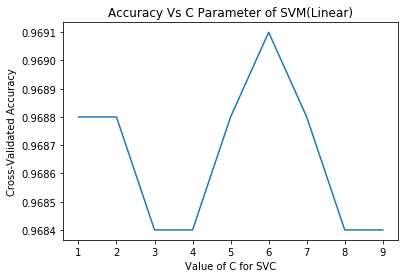

In [263]:
sns.lineplot(x=C_List,y=Acc_List)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy Vs C Parameter of SVM(Linear)')

## Using GridSearchCV

In [269]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
#display(test_set.loc[:,'kurt':'sd'])
train_set.loc[:,'kurt':'mindom']=StandardScaler().fit_transform(train_set.loc[:,'kurt':'mindom'])
test_set.loc[:,'kurt':'mindom'] =StandardScaler().fit_transform(test_set.loc[:,'kurt':'mindom'])
svcLinearGrid = SVC(probability=True)
start_time=time.time()
params=dict(C=[6],kernel=['linear'],random_state=[5,10,13,45],class_weight=[{0:1},{0:2},{0:6}])
grid=GridSearchCV(svcLinearGrid,params,cv=10).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('grid best score: ',grid.best_score_)
print('grid best paramters: ',grid.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


grid best score:  0.9691943127962085
grid best paramters:  {'C': 6, 'class_weight': {0: 1}, 'kernel': 'linear', 'random_state': 5}
Execution time: 72.60279583930969 ms


In [270]:
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.9779179810725552


## Using RandomizedSearchCV

In [316]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
import warnings
warnings.simplefilter('ignore')
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
sc=StandardScaler()
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
train_set.loc[:,'kurt':'mindom'] =sc.fit_transform(train_set.loc[:,'kurt':'mindom'])
test_set.loc[:,'kurt':'mindom']=sc.transform(test_set.loc[:,'kurt':'mindom'])
#display(test_set.loc[:,'kurt':'sd'])
svcLinearRandom = SVC(probability=True)
start_time=time.time()
params=dict(C=[6],kernel=['linear'],random_state=[5,10,13,45],class_weight=[{0:1},{0:2},{0:6}])
grid=RandomizedSearchCV(svcLinearRandom,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('grid best score: ',grid.best_score_)
print('grid best parameters: ',grid.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

grid best score:  0.9691943127962085
grid best parameters:  {'random_state': 45, 'kernel': 'linear', 'class_weight': {0: 1}, 'C': 6}
Execution time: 22.810219764709473 ms


In [317]:
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.9779179810725552


In [318]:
y_pred=grid.predict(test_set.loc[:,'kurt':'mindom'])
p,r,f,s = precision_recall_fscore_support(test_set['label'], y_pred)
print('Precision_score: ',p,'\nRecall Score:',r,'\nf_score',f,'\n The overall f1_score: {}  '
      .format(f1_score(test_set['label'],y_pred)))

Precision_score:  [0.984026 0.971963] 
Recall Score: [0.971609 0.984227] 
f_score [0.977778 0.978056] 
 The overall f1_score: 0.9780564263322884  


In [319]:
Label_probabability = pd.Series()
svcLinearRandom.fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
for each in svcLinearRandom.predict_proba((test_set.loc[:,'kurt':'mindom'])):
    Label_probabability = Label_probabability.append(pd.Series(np.amax(each)))
Label_probabability_DTFrame = pd.concat([Label_probabability.reset_index(drop=True),
                                         test_set['label'].reset_index(drop=True),
                                         pd.Series(svcLinearRandom.predict(test_set.loc[:,'kurt':'mindom']))],axis=1,
                                        keys=['Probability','Actual','Predicted'])
Label_probabability_DTFrame['SameOrNot']=abs(Label_probabability_DTFrame.Actual- Label_probabability_DTFrame.Predicted)
Label_probabability_DTFrame[Label_probabability_DTFrame.SameOrNot!=0].shape

(8, 4)

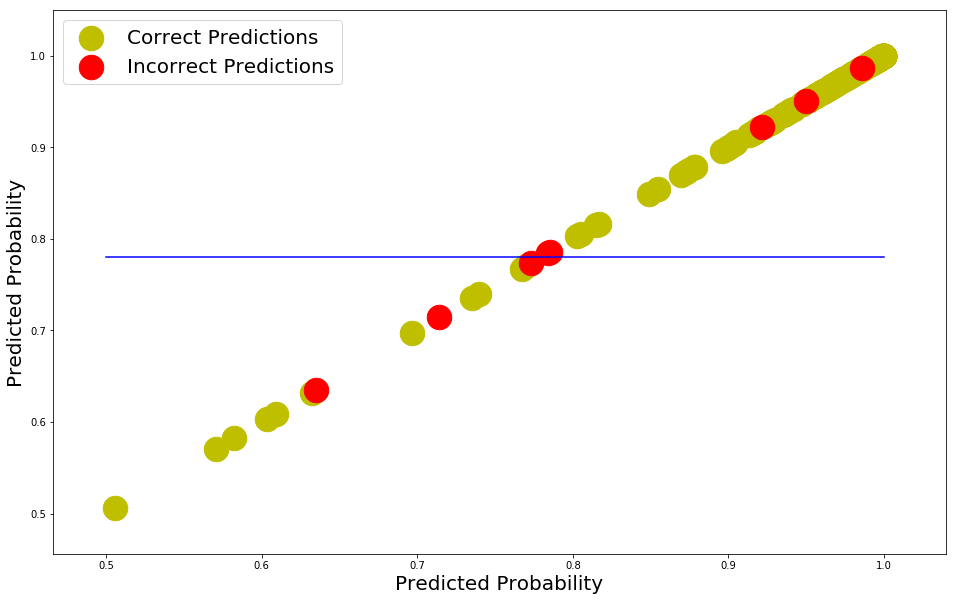

In [320]:
plt.figure(figsize=(16,10))
plt.scatter(Label_probabability_DTFrame.query('SameOrNot == 0').Probability,Label_probabability_DTFrame.query('SameOrNot == 0').Probability,
            color='y',marker='o',s=600,label='Correct Predictions')
plt.scatter(Label_probabability_DTFrame.query('SameOrNot == 1').Probability,Label_probabability_DTFrame.query('SameOrNot == 1').Probability,
            color='r',marker='o',s=600,label='Incorrect Predictions')
plt.plot(pd.Series([0.5,1]),pd.Series([0.78,0.78]),color='b')
plt.xlabel('Predicted Probability',fontsize=20)
plt.ylabel('Predicted Probability',fontsize=20)
plt.legend(loc='best',fontsize=20)

# SVM rbf

## Taking kernel as rbf and taking different values gamma

In [280]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(df1.iloc[:,:-1])
C_List=pd.Series()
Acc_List=pd.Series()
DTFrame=pd.DataFrame()
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
for i in gamma_range:
    svcCrossRBF = SVC(kernel='rbf',gamma=i)
    scores=cross_val_score(svcCrossRBF,X,df1.iloc[:,-1].values,scoring='accuracy',cv=10)
    C_List = C_List.append(pd.Series(i))
    Acc_List = Acc_List.append(pd.Series(round(scores.mean(),4)))
DTFrame= pd.concat([C_List,Acc_List],axis=1,keys=['gamma_values','Accuracy_values'])
DTFrame['Accuracy_values'] = DTFrame['Accuracy_values'].apply(lambda x : str(x).replace('$',''))
DTFrame

,gamma_values,Accuracy_values
0,$0.00,0.8878
0,$0.00,0.9559
0,$0.01,0.9681
0,$0.10,0.9631
0,$1.00,0.9068
0,$10.00,0.5968
0,$100.00,0.5


Text(0.5,1,'Accuracy VS Gamma Values for SVC RBF')

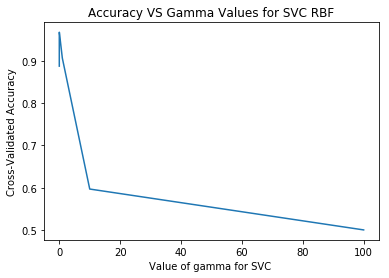

In [289]:
sns.lineplot(x=C_List,y=Acc_List)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy VS Gamma Values for SVC RBF')

## Taking the  gamma value for highest accuracy and putting that in RandomizedSearchCV

In [282]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
#display(test_set.loc[:,'kurt':'sd'])
svc = SVC(probability=True)
start_time=time.time()
for i in range(0,10):
    params=dict(C=[0.2,0.3,0.6,1.0],kernel=['rbf'],random_state=[5,10,13,45],gamma=[0.01],class_weight=[{0:i}])
    grid=RandomizedSearchCV(svc,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
    print('grid best score:  for class weight '+ str(i),grid.best_score_)
    print('grid best parameters: ',grid.best_params_)

grid best score:  for class weight 0 0.5
grid best parameters:  {'random_state': 5, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': {0: 0}, 'C': 0.6}
grid best score:  for class weight 1 0.6978672985781991
grid best parameters:  {'random_state': 10, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': {0: 1}, 'C': 1.0}
grid best score:  for class weight 2 0.655608214849921
grid best parameters:  {'random_state': 10, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': {0: 2}, 'C': 1.0}
grid best score:  for class weight 3 0.5821484992101106
grid best parameters:  {'random_state': 13, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': {0: 3}, 'C': 1.0}
grid best score:  for class weight 4 0.514612954186414
grid best parameters:  {'random_state': 10, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': {0: 4}, 'C': 1.0}
grid best score:  for class weight 5 0.514612954186414
grid best parameters:  {'random_state': 45, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': {0: 5}, 'C': 1.0}
grid best score:  for c

### Since the accuracy for class_weight 1 is the best we are going ahead with class_weight:1

In [283]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
#display(test_set.loc[:,'kurt':'sd'])
svc = SVC(probability=True)
start_time=time.time()
params=dict(C=[0.2,0.3,0.6,1.0],kernel=['rbf'],random_state=[5,10,13,45],class_weight=[{0:1}])
grid=RandomizedSearchCV(svc,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('grid best score:  for class weight ',grid.best_score_)
print('grid best parameters: ',grid.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

grid best score:  for class weight  0.7014218009478673
grid best parameters:  {'random_state': 10, 'kernel': 'rbf', 'class_weight': {0: 1}, 'C': 1.0}
Execution time: 73.6187071800232 ms


In [284]:
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.7350157728706624


In [285]:
y_pred = grid.predict(test_set.loc[:,'kurt':'mindom'])
p,r,f,s = precision_recall_fscore_support(test_set['label'], y_pred)
print('Precision_score: ',p,'\nRecall Score:',r,'\nf_score',f,'\n The overall f1_score: {}'.format(f1_score(test_set['label'],y_pred)))

Precision_score:  [0.745875 0.725076] 
Recall Score: [0.712934 0.757098] 
f_score [0.729032 0.740741] 
 The overall f1_score: 0.7407407407407407


In [292]:
Label_probabability = pd.Series()
svc.fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
for each in svc.predict_proba((test_set.loc[:,'kurt':'mindom'])):
    Label_probabability = Label_probabability.append(pd.Series(np.amax(each)))
Label_probabability_DTFrame = pd.concat([Label_probabability.reset_index(drop=True),
                                         test_set['label'].reset_index(drop=True),
                                         pd.Series(svc.predict(test_set.loc[:,'kurt':'mindom']))],axis=1,
                                        keys=['Probability','Actual','Predicted'])
Label_probabability_DTFrame['SameOrNot']=abs(Label_probabability_DTFrame.Actual- Label_probabability_DTFrame.Predicted)
Label_probabability_DTFrame['Incorrect_Predictions']=Label_probabability_DTFrame['SameOrNot'].apply(lambda x: 'No' if x ==0 else 'Yes')
Label_probabability_DTFrame.head()

,Probability,Actual,Predicted,SameOrNot,Incorrect_Predictions
0,$0.75,1,1,0,No
1,$0.69,1,1,0,No
2,$0.78,1,1,0,No
3,$0.64,1,1,0,No
4,$0.57,1,1,0,No


In [293]:
from sklearn.metrics import confusion_matrix as cm
svm_pred=grid.predict(test_set.loc[:,'kurt':'mindom'])
matrix = cm(test_set['label'],svm_pred)
print('The confusion matrix is: ')
print(matrix)

The confusion matrix is: 
[[226  91]
 [ 77 240]]


Text(0.5,1,'Incorrect_Predictions VS the probability')

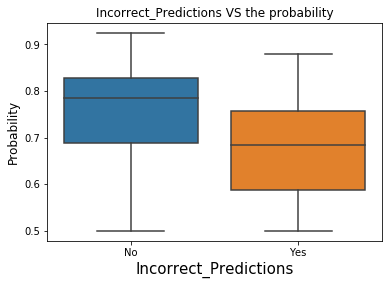

In [299]:
sns.boxplot(x=Label_probabability_DTFrame.Incorrect_Predictions,y=Label_probabability_DTFrame.Probability,showfliers=False)
plt.xlabel('Incorrect_Predictions',fontsize=15)
plt.ylabel('Probability',fontsize=12)
plt.title('Incorrect_Predictions VS the probability',fontsize=12)

# SVM Poly 

In [300]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(df1.iloc[:,:-1])
C_List=pd.Series()
Acc_List=pd.Series()
DTFrame=pd.DataFrame()
polyList=[2,3,4,5,6]
for i in polyList:
    svcCrossRBF = SVC(kernel='poly',degree=i)
    scores=cross_val_score(svcCrossRBF,X,df1.iloc[:,-1].values,scoring='accuracy',cv=10)
    C_List = C_List.append(pd.Series(i))
    Acc_List = Acc_List.append(pd.Series(round(scores.mean(),4)))
DTFrame= pd.concat([C_List,Acc_List],axis=1,keys=['poly_values','Accuracy_values'])
DTFrame['Accuracy_values'] = DTFrame['Accuracy_values'].apply(lambda x : str(x).replace('$',''))
DTFrame

,poly_values,Accuracy_values
0,2,0.8512
0,3,0.946
0,4,0.8314
0,5,0.8662
0,6,0.7752


Text(0,0.5,'Cross-Validated Accuracy')

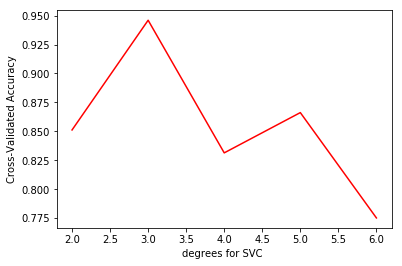

In [301]:
sns.lineplot(x=C_List,y=Acc_List,color='red')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [302]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=9,test_size=0.2,stratify=df['label'])
sc=StandardScaler()
train_set.loc[:,'kurt':'mindom']= sc.fit_transform(train_set.loc[:,'kurt':'mindom'])
#display(test_set.loc[:,'kurt':'sd'])
svc = SVC(probability=True)
start_time=time.time()
params=dict(C=[0.6,1.0],kernel=['poly'],degree=[2,3,4],random_state=[5,10,13,45],class_weight=[{0:1}])
for i in range(3,10):
    grid=RandomizedSearchCV(svc,params,cv=i).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
    print('grid best score:  for class weight ',grid.best_score_)
    print('grid best parameters: ',grid.best_params_)

grid best score:  for class weight  0.9451026856240127
grid best parameters:  {'random_state': 45, 'kernel': 'poly', 'degree': 3, 'class_weight': {0: 1}, 'C': 1.0}
grid best score:  for class weight  0.9494470774091627
grid best parameters:  {'random_state': 5, 'kernel': 'poly', 'degree': 3, 'class_weight': {0: 1}, 'C': 1.0}
grid best score:  for class weight  0.9478672985781991
grid best parameters:  {'random_state': 10, 'kernel': 'poly', 'degree': 3, 'class_weight': {0: 1}, 'C': 1.0}
grid best score:  for class weight  0.9494470774091627
grid best parameters:  {'random_state': 10, 'kernel': 'poly', 'degree': 3, 'class_weight': {0: 1}, 'C': 1.0}
grid best score:  for class weight  0.9490521327014217
grid best parameters:  {'random_state': 10, 'kernel': 'poly', 'degree': 3, 'class_weight': {0: 1}, 'C': 1.0}
grid best score:  for class weight  0.9510268562401264
grid best parameters:  {'random_state': 45, 'kernel': 'poly', 'degree': 3, 'class_weight': {0: 1}, 'C': 1.0}
grid best score: 

In [303]:
# 5 fold Cross validation produces the best score

In [304]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import time
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
train_set,test_set = train_test_split(dfnew,random_state=5,test_size=0.2,stratify=df['label'])
sc=StandardScaler()
train_set.loc[:,'kurt':'mindom']= sc.fit_transform(train_set.loc[:,'kurt':'mindom'])
#display(test_set.loc[:,'kurt':'sd'])
svc1 = SVC(probability=True)
start_time=time.time()
params=dict(C=[0.6,1.0],kernel=['poly'],degree=[1,2,3,4],random_state=[5,10,13,45],class_weight=[{0:1}])
grid=RandomizedSearchCV(svc1,params,cv=5).fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
print('grid best score:  for class weight ',grid.best_score_)
print('grid best parameters: ',grid.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

grid best score:  for class weight  0.9699842022116903
grid best parameters:  {'random_state': 13, 'kernel': 'poly', 'degree': 1, 'class_weight': {0: 1}, 'C': 1.0}
Execution time: 22.586835384368896 ms


In [305]:
test_set.loc[:,'kurt':'mindom']=sc.transform(test_set.loc[:,'kurt':'mindom'])
print('Test_accuracy: ',grid.score(test_set.loc[:,'kurt':'mindom'],test_set['label']))

Test_accuracy:  0.9747634069400631


In [306]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,f1_score
from sklearn.preprocessing import LabelEncoder
dfnew['label'] = (LabelEncoder().fit_transform(dfnew['label']))
#display(test_set.loc[:,'kurt':'sd'])
svc1.fit(train_set.loc[:,'kurt':'mindom'],train_set['label'])
y_pred = svc1.predict(test_set.loc[:,'kurt':'mindom'])
print('The test dataset confusion_matrix is :\n',confusion_matrix(test_set['label'],y_pred))

The test dataset confusion_matrix is :
 [[314   3]
 [ 11 306]]


In [309]:
Label_probabability = pd.Series()
for each in svc1.predict_proba((test_set.loc[:,'kurt':'mindom'])):
    Label_probabability = Label_probabability.append(pd.Series(np.amax(each)))
Label_probabability_DTFrame = pd.concat([Label_probabability.reset_index(drop=True),
                                         test_set['label'].reset_index(drop=True),
                                         pd.Series(svc1.predict(test_set.loc[:,'kurt':'mindom']))],axis=1,
                                        keys=['Probability','Actual','Predicted'])
Label_probabability_DTFrame['SameOrNot']=abs(Label_probabability_DTFrame.Actual - Label_probabability_DTFrame.Predicted)
Label_probabability_DTFrame['Incorrect_Predictions']=Label_probabability_DTFrame['SameOrNot'].apply(lambda x: 'No' if x ==0 else 'Yes')
Label_probabability_DTFrame.head()

,Probability,Actual,Predicted,SameOrNot,Incorrect_Predictions
0,$1.00,0,0,0,No
1,$1.00,1,1,0,No
2,$0.99,1,1,0,No
3,$1.00,0,0,0,No
4,$0.99,0,0,0,No


In [312]:
Label_probabability_DTFrame[Label_probabability_DTFrame.SameOrNot !=0]

,Probability,Actual,Predicted,SameOrNot,Incorrect_Predictions
73,$1.00,1,0,1,Yes
130,$0.53,1,0,1,Yes
144,$0.87,1,0,1,Yes
296,$0.56,0,1,1,Yes
317,$1.00,1,0,1,Yes
349,$0.82,1,0,1,Yes
352,$0.91,0,1,1,Yes
417,$0.92,1,0,1,Yes
479,$0.99,1,0,1,Yes
524,$0.52,1,0,1,Yes


Text(0.5,1,'Incorrect_Predictions VS Probability')

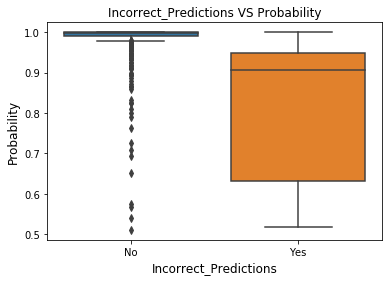

In [314]:
sns.boxplot(x=Label_probabability_DTFrame.Incorrect_Predictions,y=Label_probabability_DTFrame.Probability)
plt.xlabel('Incorrect_Predictions',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.xlabel('Incorrect_Predictions',fontsize=12)
plt.title('Incorrect_Predictions VS Probability',fontsize=12)